Detecting problems and streamlining solutions will need to be detail oriented. To detail journeys, will need to read data in angles that will deliver the best solution. Reading data and structuring a journey will only come with deep research. 


Measuring math:

This data set is an outcome of how the customer success team at Plum is performing on emails. Column C: Group indicates the different teams at Plum. Share a view on:
	
a.	How are the efficiency numbers looking like? Can you share your views?
b.	Which groups are quick, slow etc. Create a table + relevant charts.
c.	What type of tickets are taking the most time to resolve? Create a table + relevant charts.
d.	Create the different type of data types we can infer from this data.


In [1]:
# Importing the Libaries

import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

In [2]:
# Extracting Data Set

data=pd.read_csv("Plum.csv")

In [3]:
data

,Id,Requester id,Group,Status,Priority,Via,Created at,Updated at,Assigned at,Initially assigned at,...,Reopens,Replies,First reply time in minutes within business hours,First resolution time in minutes,First resolution time in minutes within business hours,Full resolution time in minutes,Full resolution time in minutes within business hours,Requester wait time in minutes,Requester wait time in minutes within business hours,Manual Tagging of Categories [list]
0,297732,10300555531549,Support,Solved,Low,Mail,08-04-2023 20:52,14-06-2023 16:30,09-04-2023 10:28,09-04-2023 10:28,...,11,11,173.0,12975.0,6488.0,96218.0,47978.0,17853.0,8516.0,Is my treatment covered (IMTC)
1,311457,10420228868125,Reimbursement Claims,Closed,Low,Mail,24-04-2023 19:32,15-06-2023 16:37,25-04-2023 10:18,25-04-2023 10:18,...,10,10,1527.0,2984.0,1527.0,45893.0,22853.0,30113.0,15139.0,-
2,329907,10991633548957,Support,Solved,Low,Mail,16-05-2023 17:43,30-05-2023 14:56,16-05-2023 18:18,16-05-2023 18:18,...,10,11,61.0,1563.0,843.0,19993.0,9913.0,7115.0,3335.0,Claims
3,301553,10376247288477,Support,Solved,Low,Mail,13-04-2023 11:03,15-06-2023 20:55,13-04-2023 13:04,13-04-2023 13:04,...,9,9,381.0,2888.0,1448.0,91313.0,45953.0,18221.0,9401.0,Claims
4,310966,7302858920989,Support,Closed,Low,Mail,24-04-2023 13:21,08-06-2023 18:37,27-04-2023 14:48,24-04-2023 13:48,...,9,9,37.0,37.0,37.0,36304.0,17739.0,7427.0,4008.0,Claims
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16471,344013,11283774362653,Support,Solved,Low,Mail,31-05-2023 22:37,01-06-2023 10:09,01-06-2023 09:33,01-06-2023 09:33,...,0,1,69.0,692.0,69.0,692.0,69.0,692.0,69.0,Others
16472,344014,7302298964893,Support,Solved,Low,Mail,31-05-2023 22:47,05-06-2023 09:49,01-06-2023 09:33,01-06-2023 09:33,...,0,3,90.0,6422.0,2929.0,6422.0,2929.0,6422.0,2930.0,Is my treatment covered (IMTC)
16473,344021,7303060862237,Support,Hold,Low,Mail,31-05-2023 23:16,01-06-2023 10:09,01-06-2023 09:34,01-06-2023 09:34,...,0,1,69.0,NaN,NaN,NaN,NaN,653.0,69.0,-
16474,344025,10098421736733,Reimbursement Claims,Solved,Low,Mail,31-05-2023 23:35,09-06-2023 16:43,01-06-2023 10:09,01-06-2023 10:09,...,0,2,280.0,12548.0,6223.0,12548.0,6223.0,12547.0,6223.0,-


In [5]:
data.describe()

,Id,Requester id,Resolution time,Reopens,Replies,First reply time in minutes within business hours,First resolution time in minutes,First resolution time in minutes within business hours,Full resolution time in minutes,Full resolution time in minutes within business hours,Requester wait time in minutes,Requester wait time in minutes within business hours
count,16476.000000,1.647600e+04,14409.000000,16476.000000,16476.000000,12760.000000,14834.000000,14834.000000,14409.000000,14409.000000,16327.000000,16327.000000
mean,316876.239743,8.422350e+12,205.246235,0.242899,2.152525,1852.113950,10177.772752,5131.839693,12314.136304,6196.644320,10443.141238,5259.864213
std,15369.829459,1.545776e+12,283.541651,0.705320,2.681740,3916.902674,15243.191721,7625.355098,17012.495327,8504.443833,15858.506931,7917.994694
min,291015.000000,5.879787e+12,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,303624.750000,7.273930e+12,22.000000,0.000000,1.000000,122.000000,916.250000,437.000000,1340.000000,652.000000,936.000000,491.000000
50%,316564.500000,7.306863e+12,96.000000,0.000000,1.000000,478.000000,4299.000000,2154.000000,5751.000000,2880.000000,4238.000000,2126.000000
75%,330251.250000,1.011376e+13,259.000000,0.000000,3.000000,1935.250000,12085.750000,6178.750000,15559.000000,7847.000000,12176.000000,6212.000000
max,344028.000000,1.129824e+13,1805.000000,11.000000,36.000000,52770.000000,108322.000000,54322.000000,108322.000000,54322.000000,108942.000000,54355.000000


In [6]:
# Finding How many Group are there

data["Group"].unique()

array(['Support', 'Reimbursement Claims', 'Onboardings', 'Endorsements'],
      dtype=object)

In [7]:
#  Finding How many Id are there

data["Id"].nunique()

16476

In [8]:
#  Finding How many Requesters are there

data["Requester id"].nunique()

6764

In [9]:
data["Requester id"].value_counts()
# Most of the requests are raised by ID-6721632937629 

6721632937629     1965
7303317119773      239
6764218515229      193
9962972286365      154
7223472162077      134
                  ... 
10467955110173       1
10467988354845       1
10015249375005       1
10468244715421       1
11285001510813       1
Name: Requester id, Length: 6764, dtype: int64

# Group

<AxesSubplot: xlabel='Group', ylabel='count'>

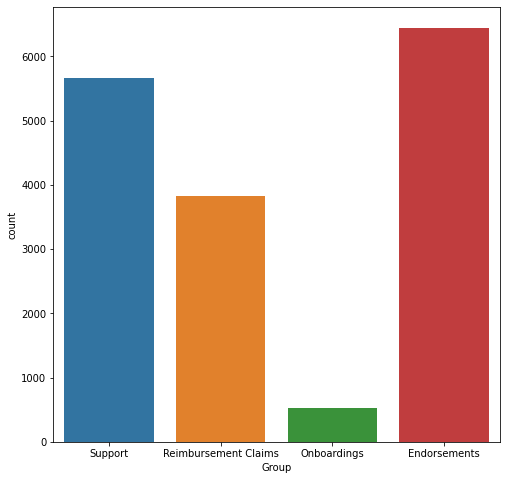

In [10]:
#Ticket count for Groups
plt.figure(figsize=(8,8))
sns.countplot(x=data["Group"])

In [11]:
data["Group"].value_counts()
# Most odf theb tickets are seened by Endorsements Group, Followed by Support

Endorsements            6449
Support                 5670
Reimbursement Claims    3827
Onboardings              530
Name: Group, dtype: int64

In [12]:
# GROUP V/S VIA

x1=pd.crosstab(index=data["Group"],columns=data["Via"],margins=True)
x1

#

Via,Closed Ticket,Internal Communication,Mail,OutBound,All
Group,,,,,
Endorsements,84,36,5865,464,6449
Onboardings,17,2,505,6,530
Reimbursement Claims,59,4,3310,454,3827
Support,156,1986,3401,127,5670
All,316,2028,13081,1051,16476


In [13]:
# Group V/s Satisfaction Score

x2=pd.crosstab(index=data["Group"],columns=data["Satisfaction Score"])
x2

# Most of the Satisfaction score is scored  by Support Group.

Satisfaction Score,1,2,3,4,5,Offered
Group,,,,,,
Support,15,14,64,311,409,4640


In [14]:
# Group v/s Reopens

x3=pd.crosstab(index=data["Group"],columns=data["Reopens"])
x3

# Most of the  opens happend with Support Group 

Reopens,0,1,2,3,4,5,6,7,8,9,10,11
Group,,,,,,,,,,,,
Endorsements,6119,258,51,14,3,3,1,0,0,0,0,0
Onboardings,448,61,16,1,0,2,1,0,1,0,0,0
Reimbursement Claims,2837,652,206,82,26,14,6,3,0,0,1,0
Support,4474,815,231,76,35,15,8,8,3,3,1,1


In [15]:
# Group v/s Manual Tagging of Categories [list]


x4=pd.crosstab(index=data["Group"],columns=data["Manual Tagging of Categories [list]"])
x4

#Most of the Claims and HR queries and all other tagging list is solved by Support Group

Manual Tagging of Categories [list],-,Claims,HR Queries,Health Benefits,Health ID,Is my treatment covered (IMTC),Manage dependents,Network or Blacklisted Hospitals,Not Applicable,Others,Super Top-up (STU),Telehealth
Group,,,,,,,,,,,,
Endorsements,6449,0,0,0,0,0,0,0,0,0,0,0
Onboardings,530,0,0,0,0,0,0,0,0,0,0,0
Reimbursement Claims,3827,0,0,0,0,0,0,0,0,0,0,0
Support,3117,904,266,75,131,678,148,28,74,159,70,20


In [16]:
# Group v/s Priority

x5=pd.crosstab(index=data["Group"],columns=data["Priority"])
x5

Priority,Low,Normal,Urgent
Group,,,
Endorsements,6441,0,8
Onboardings,530,0,0
Reimbursement Claims,3825,2,0
Support,5486,10,174


# Status

In [17]:
# Status v/s Priority

S1=pd.crosstab(index=data["Status"],columns=data["Priority"])
S1
# Most of closed and solved tickets belongs to Low Category and Urgent Category

Priority,Low,Normal,Urgent
Status,,,
Closed,12103,9,158
Hold,785,1,4
New,126,0,0
Open,468,1,1
Pending,680,0,1
Solved,2120,1,18


In [18]:
# Status v/s Via

S2=pd.crosstab(index=data["Status"],columns=data["Via"])
S2

#

Via,Closed Ticket,Internal Communication,Mail,OutBound
Status,,,,
Closed,232,1847,9439,752
Hold,21,15,653,101
New,2,0,124,0
Open,7,21,408,34
Pending,20,2,638,21
Solved,34,143,1819,143


# Priority

In [19]:
# Prority v/s Via

P1=pd.crosstab(index=data["Priority"],columns=data["Via"])
P1

Via,Closed Ticket,Internal Communication,Mail,OutBound
Priority,,,,
Low,311,1854,13074,1043
Normal,0,0,4,8
Urgent,5,174,3,0


#### --------------------------------------------------------------------------------------------------------------------

### A.How are the efficiency numbers looking like? Can you share your views?

##### The Efficiency we can infer from Dataset :

      # 1. Most of the Claims and HR queries and all other tagging list is solved by Support Group.
      
      # 2. Most of the Open Tickets happend with Support Group.
      
      # 3. Most of closed and solved tickets belongs to Low Category and Urgent Category.
      
      # 4. Most of the Satisfaction score is scored  by Support Group and mostly they Scored 5 rating so they scored a 100     Percent Rating.
      
      # 5. Most of the tickets are assigned to Endorsements Group then Followed by Support.
      
      # 6. Most of the requests are raised by ID-6721632937629.

#### ----------------------------------------------------------------------------------------------------------------------------------

### B.	Which groups are quick, slow etc. Create a table + relevant charts

#### Steps
1. Fabricate a tabulation delineating the correlation between 'Group,' 'Status,' and 'Via.'

2. Construct illustrative visuals contrasting Categorical versus Categorical and Categorical versus Numerical data.

3. Draw conclusions derived from the aforementioned diagrams and table.

4. Validate the derived outcomes through Chi-square testing to ascertain the veracity of the table's results.

In [20]:
# Table

x=pd.crosstab(index=data["Group"],columns=data["Status"])
x

Status,Closed,Hold,New,Open,Pending,Solved
Group,,,,,,
Endorsements,4794,17,124,162,527,825
Onboardings,213,0,2,22,147,146
Reimbursement Claims,2455,662,0,186,1,523
Support,4808,111,0,100,6,645


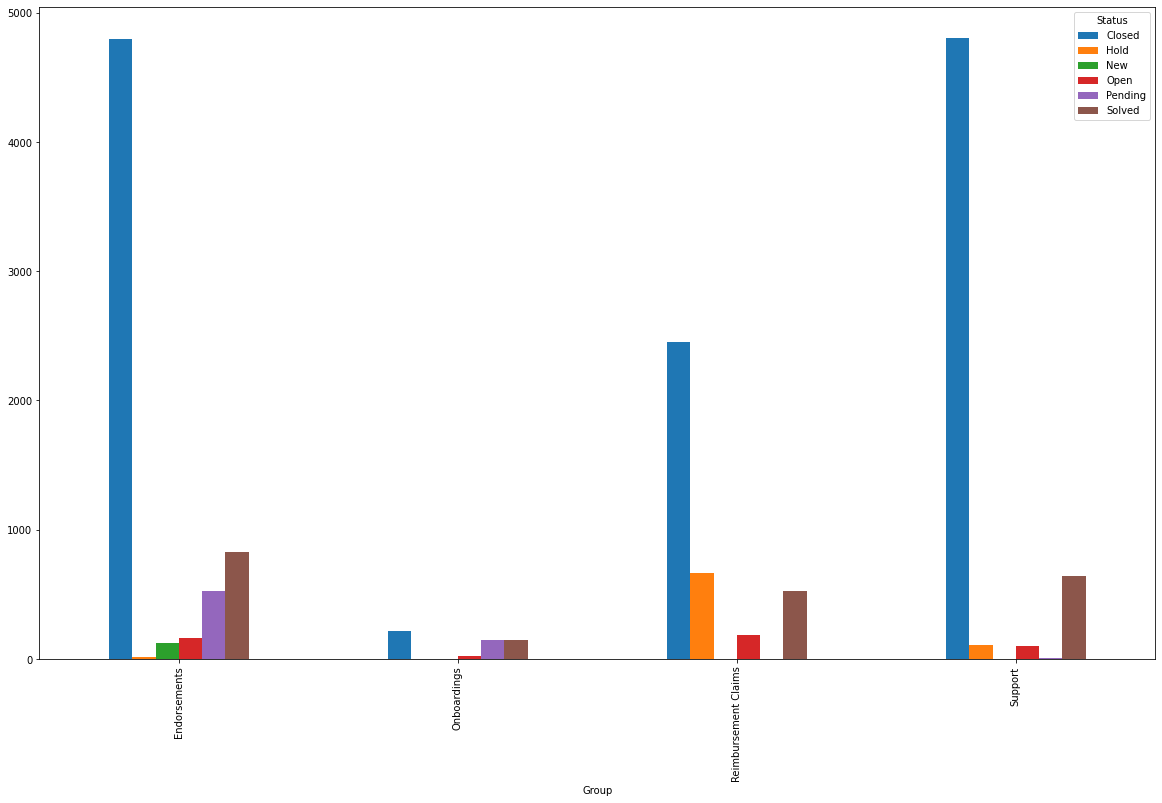

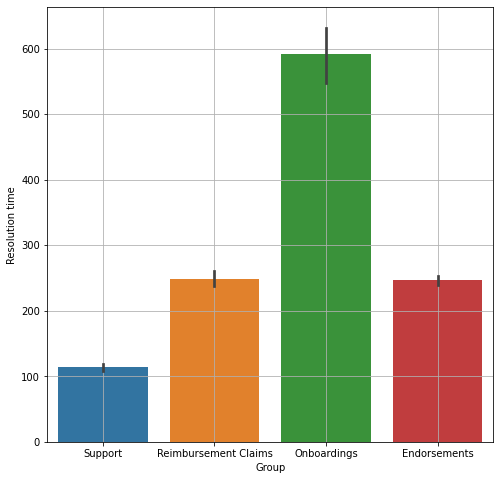

In [21]:
# Chart- Categorical v/s Categorical
pd.crosstab(index=data["Group"],columns=data["Status"]).plot(kind="bar",figsize=(20,12))
plt.show()

# Chart- Categorical v/s Numerical
plt.figure(figsize=(8,8))
sns.barplot(data=data,x="Group",y="Resolution time")
plt.grid()
plt.show()

In [22]:
x1=pd.crosstab(index=data["Group"],columns=data["Via"],margins=True)
x1


Via,Closed Ticket,Internal Communication,Mail,OutBound,All
Group,,,,,
Endorsements,84,36,5865,464,6449
Onboardings,17,2,505,6,530
Reimbursement Claims,59,4,3310,454,3827
Support,156,1986,3401,127,5670
All,316,2028,13081,1051,16476


#### Results
 
Upon meticulous scrutiny of the charts, it's discernible that the 'Onboarding Group' is demanding a disproportionately high resolution duration. An in-depth analysis into the ticket dispersion across groups reveals that within the 'Onboarding' team, tickets originating from email interactions are especially tardy.When juxtaposing this data with other teams handling email tickets, it's evident that the 'Onboarding' team's resolutions are sub-optimal. This pivotal revelation allows us to spotlig

In [23]:
# We are trying to test the hypothesis that whether Support Group Resolve ticket Quickly.
# Checking through Chi Square Testing

# Assumptions-
  #1. Assuming Confidence level - 95 % and Significance level - 5%
  #2. Null Hypothesis(H0)- Support Group is Quicker


In [24]:
ttest_stat,pvalue,dof,Expected_table=chi2_contingency(x)
if pvalue<0.05:
    print("Accept Null Hypothesis- Support Group is Quicker in Resolving")
    print("pvalue - ",pvalue)
else:
    print("Reject Null Hypothesis")

Accept Null Hypothesis- Support Group is Quicker in Resolving
pvalue -  0.0


#### ---------------------------------------------------------------------------------------------------------------------

### C. What type of tickets are taking the most time to resolve? Create a table + relevant charts

#### Steps

1. Introduce a new column to the table predicated on 'Resolution Time,' segmenting them based on predefined bins and values.

2. Fabricate a table juxtaposing 'Priority versus New Column' and 'Via versus New Column,' embodying the intricacies of the data.

3. Curate a graphic representation contrasting Categorical data against Categorical data.

4. Extrapolate meaningful insights from the aforementioned graphical interpretations and table.

5. Validate these gleaned insights via meticulous Chi-s

In [25]:
# Adding new column in table on basis of Resolution time
bins=[0,200,400,700,1000,1300,1800]
values=["Very Quick","Fast","Moderate","Slow","Very Slow","Tough To Resolve"]
data["new"]=pd.cut(data["Resolution time"],bins,labels=values)

In [26]:
data

,Id,Requester id,Group,Status,Priority,Via,Created at,Updated at,Assigned at,Initially assigned at,...,Replies,First reply time in minutes within business hours,First resolution time in minutes,First resolution time in minutes within business hours,Full resolution time in minutes,Full resolution time in minutes within business hours,Requester wait time in minutes,Requester wait time in minutes within business hours,Manual Tagging of Categories [list],new
0,297732,10300555531549,Support,Solved,Low,Mail,08-04-2023 20:52,14-06-2023 16:30,09-04-2023 10:28,09-04-2023 10:28,...,11,173.0,12975.0,6488.0,96218.0,47978.0,17853.0,8516.0,Is my treatment covered (IMTC),Tough To Resolve
1,311457,10420228868125,Reimbursement Claims,Closed,Low,Mail,24-04-2023 19:32,15-06-2023 16:37,25-04-2023 10:18,25-04-2023 10:18,...,10,1527.0,2984.0,1527.0,45893.0,22853.0,30113.0,15139.0,-,Slow
2,329907,10991633548957,Support,Solved,Low,Mail,16-05-2023 17:43,30-05-2023 14:56,16-05-2023 18:18,16-05-2023 18:18,...,11,61.0,1563.0,843.0,19993.0,9913.0,7115.0,3335.0,Claims,Fast
3,301553,10376247288477,Support,Solved,Low,Mail,13-04-2023 11:03,15-06-2023 20:55,13-04-2023 13:04,13-04-2023 13:04,...,9,381.0,2888.0,1448.0,91313.0,45953.0,18221.0,9401.0,Claims,Tough To Resolve
4,310966,7302858920989,Support,Closed,Low,Mail,24-04-2023 13:21,08-06-2023 18:37,27-04-2023 14:48,24-04-2023 13:48,...,9,37.0,37.0,37.0,36304.0,17739.0,7427.0,4008.0,Claims,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16471,344013,11283774362653,Support,Solved,Low,Mail,31-05-2023 22:37,01-06-2023 10:09,01-06-2023 09:33,01-06-2023 09:33,...,1,69.0,692.0,69.0,692.0,69.0,692.0,69.0,Others,Very Quick
16472,344014,7302298964893,Support,Solved,Low,Mail,31-05-2023 22:47,05-06-2023 09:49,01-06-2023 09:33,01-06-2023 09:33,...,3,90.0,6422.0,2929.0,6422.0,2929.0,6422.0,2930.0,Is my treatment covered (IMTC),Very Quick
16473,344021,7303060862237,Support,Hold,Low,Mail,31-05-2023 23:16,01-06-2023 10:09,01-06-2023 09:34,01-06-2023 09:34,...,1,69.0,NaN,NaN,NaN,NaN,653.0,69.0,-,NaN
16474,344025,10098421736733,Reimbursement Claims,Solved,Low,Mail,31-05-2023 23:35,09-06-2023 16:43,01-06-2023 10:09,01-06-2023 10:09,...,2,280.0,12548.0,6223.0,12548.0,6223.0,12547.0,6223.0,-,Fast


#### Deciding Ticket on basis of Priority

In [27]:
# Creating Table Categorical v/s Categorical
pd.crosstab(index=data["Priority"],columns=data["new"])

new,Very Quick,Fast,Moderate,Slow,Very Slow,Tough To Resolve
Priority,,,,,,
Low,9133,1992,1362,585,301,150
Normal,7,1,2,0,0,0
Urgent,148,17,4,3,2,0


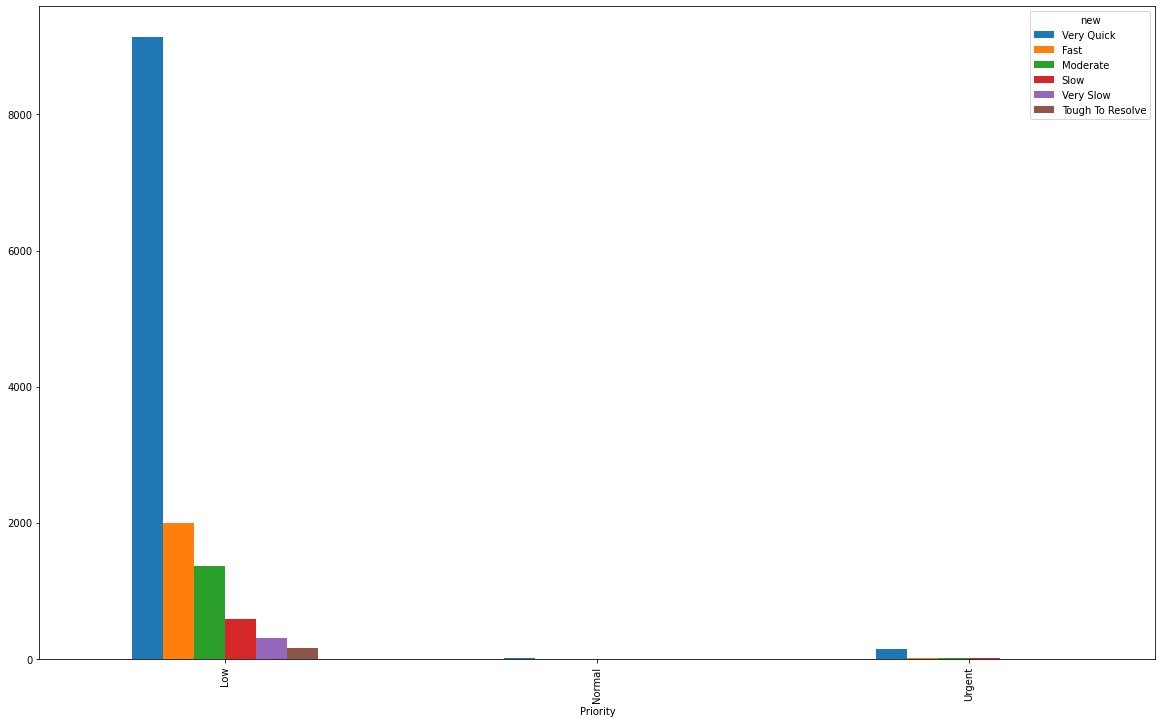

<AxesSubplot: xlabel='Priority', ylabel='Resolution time'>

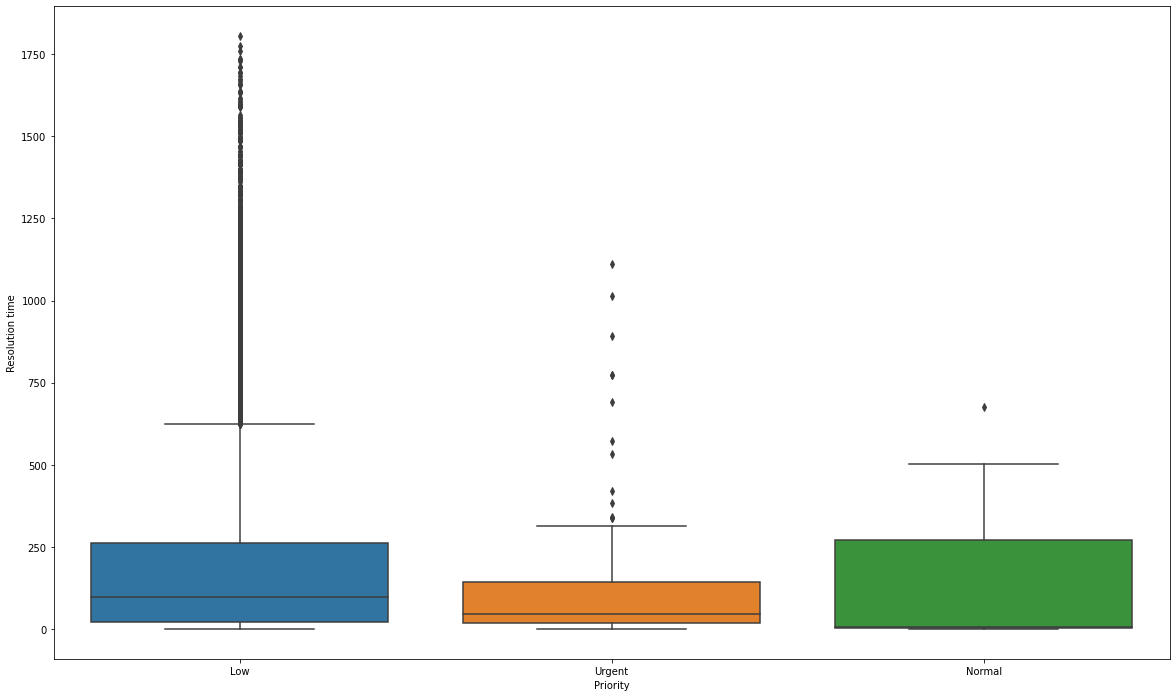

In [28]:
# Chart- Categorical v/s Categorical
pd.crosstab(index=data["Priority"],columns=data["new"]).plot(kind="bar",figsize=(20,12))
plt.show()

# BoxPlot Chart - Categorical v/s Numerical
plt.figure(figsize=(20,12))
sns.boxplot(data=data,y="Resolution time",x="Priority")

#### Result- Low Priority Tickets Take most time to resolve and come in Tough Category as the Median resolution time for Low Priority tickets are higher

#### Testing

In [29]:
# We are trying to test the hypothesis that Low Priority Tickets Take most time to resolve and come in Tough Category
# Checking through Chi Square Testing

# Assumptions-
  #1. Assuming Confidence level - 95 % and significance level - 5%
  #2.Null Hypothesis- Low Priority Tickets Take most time to resolve and come in Tough Category

In [30]:
test_stat,pvalue,dof,Expected_table=chi2_contingency(pd.crosstab(index=data["Priority"],columns=data["new"]))
if pvalue<0.05:
    print("Accept Null Hypothesis-Low Priority Tickets Take most time to resolve and come in Tough Category ")
    print("pvalue - ",pvalue)
else:
    print("Reject Null Hypothesis")

Accept Null Hypothesis-Low Priority Tickets Take most time to resolve and come in Tough Category 
pvalue -  0.001484006519138613


#### Deciding Ticket on basis of Via Column

In [31]:
# Creating Table Categorical v/s Categorical
pd.crosstab(index=data["Via"],columns=data["new"])

new,Very Quick,Fast,Moderate,Slow,Very Slow,Tough To Resolve
Via,,,,,,
Closed Ticket,159,29,28,10,6,6
Internal Communication,1769,92,49,17,6,1
Mail,7157,1813,1221,526,271,134
OutBound,203,76,70,35,20,9


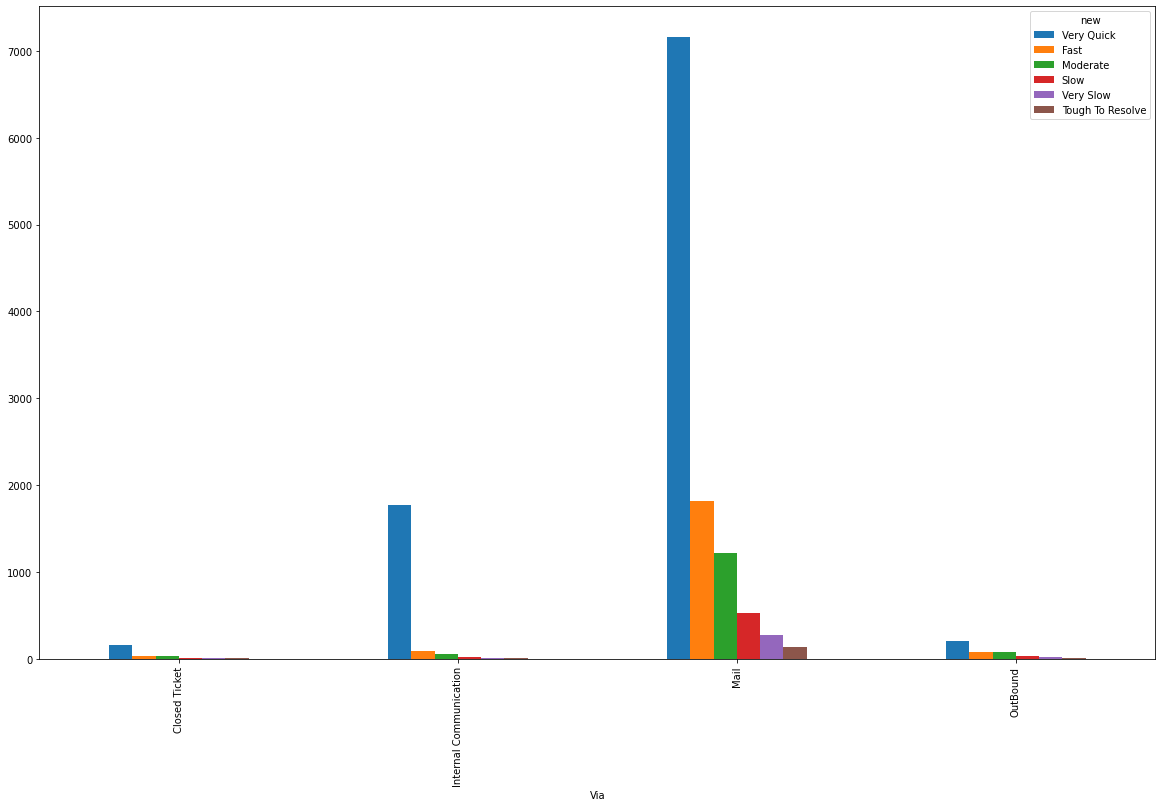

<AxesSubplot: xlabel='Via', ylabel='Resolution time'>

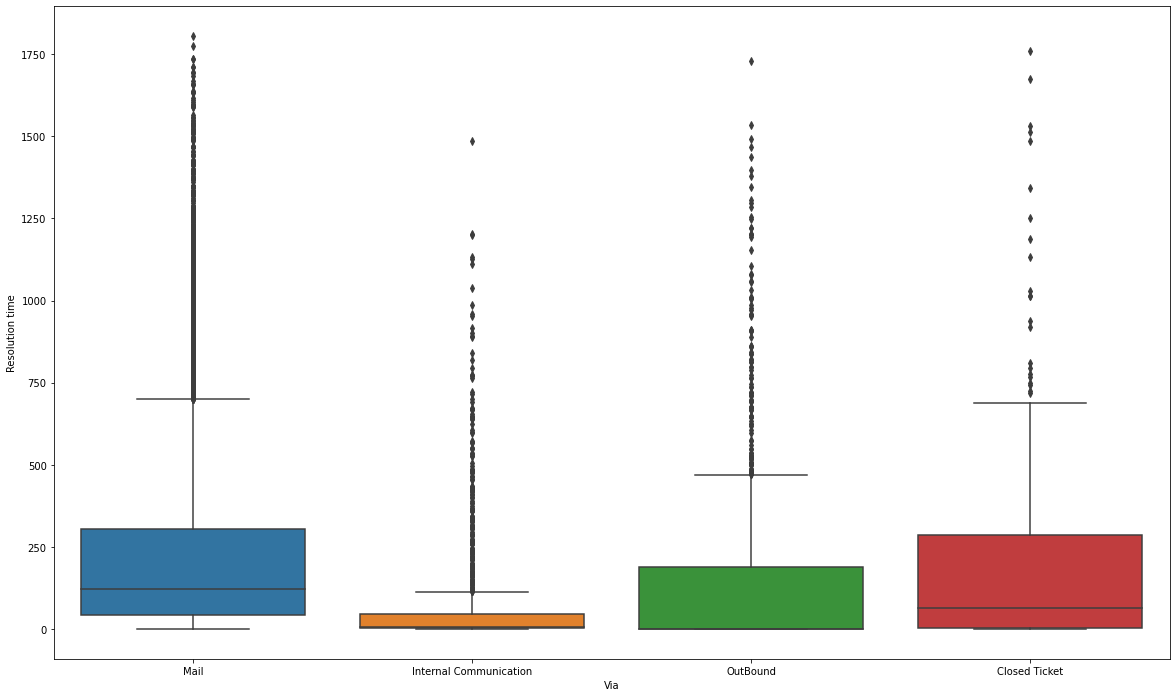

In [32]:
# Chart - Categorical v/s Categorical
pd.crosstab(index=data["Via"],columns=data["new"]).plot(kind="bar",figsize=(20,12))
plt.show()

# BoxPlot Chart - Categorical v/s Numerical

plt.figure(figsize=(20,12))
sns.boxplot(data=data,y="Resolution time",x="Via")

#### Result- Tickets get via mail Take most time to resolve and come in Tough Category and very slow Category as the median resolution time for Mail tickets is higher among all

#### Testing 

In [33]:
# We are trying to test the hypothesis that whether ickets get via mail Take most time to resolve and come in Tough Category and very slow Category.
# Checking through Chi Square Testing

# Assumptions-
  #1. Assuming Confidence level - 95 % and significance level - 5%
  #2.Null Hypothesis- Tickets get via mail Take most time to resolve and come in Tough Category and very slow Category

In [34]:
ttest_stat,pvalue,dof,Expected_table=chi2_contingency(pd.crosstab(index=data["Via"],columns=data["new"]))
if pvalue<0.05:
    print("Accept Null Hypothesis- Tickets get via mail Take most time to resolve and come in Tough Category and very slow Category")
    print("pvalue - ",pvalue)
else:
    print("Reject Null Hypothesis")

Accept Null Hypothesis- Tickets get via mail Take most time to resolve and come in Tough Category and very slow Category
pvalue -  7.07440805366082e-128


#### --------------------------------------------------------------------------------------------------------------

### D.Create the different type of data types we can infer from this data.

#### Data types Infer from this Data:

     # 1.Onboarding Group is taking more resolution time and here is the ticket Distribution to Groups and within in the onboarding team Mail tickets are taking more time ,as comparing with Data one on one with other teams on Mail tickets we found There mails are taking more time to resolve, Hence we could understand where we can approve the efficiency of this Group.
     
     # 2.The 'Support Group' exhibits a remarkable agility in addressing and resolving tickets.
     
     # 3.Tickets labelled as 'Low Priority' consume the most resolution time i.e. 2936384 Hours, and are often classified as 'Tough Category' due to their higher median resolution time..
     
     # 4.Tickets received via mail tend to require a longer resolution duration, often falling into the 'Tough' and 'Very Slow' categories, given that the median resolution time for such tickets surpasses all others.
     
     # 5. Mail Tickets are having the most sum reolution time i.e. 2634911 Hours over comparing with other tickets

In [35]:
data.dtypes

Id                                                           int64
Requester id                                                 int64
Group                                                       object
Status                                                      object
Priority                                                    object
Via                                                         object
Created at                                                  object
Updated at                                                  object
Assigned at                                                 object
Initially assigned at                                       object
Solved at                                                   object
Resolution time                                            float64
Satisfaction Score                                          object
Reopens                                                      int64
Replies                                                      i